# ENUNCIADO
El departamento de recursos humanos de una empresa ha analizado los datos de sus empleados y ha descubierto que existe un problema con el absentismo. 

Han recabado datos y quieren realizar un modelo que clasifique correctamente a los empleados en función de si faltan más de cuatro horas al mes o no. Esto les será de utilidad de cara a realizar futuras contrataciones, e incluso hacer un seguimiento a sus empleados actuales.

# SE PIDE
* Lectura de datos y análisis inicial. En este apartado se obtendrán el número de filas, el número de columnas y los nombres de las variables independientes.

Preprocesamiento de datos:
* Tratamiento de missings en caso de que los hubiese.
* Creación de la target a partir de la variable “Absenteeism time in hours”. Para valores <=4, el valor de la target debe ser 0. Para valores >4, la target debe ser 1.
* Eliminación de la variable “Absenteeism time in hours”.
* Eliminación de ids.

Visualizaciones y correlaciones:
* Obtención de descriptivos básicos con el método Describe().
* Obtención de la dispersión de las variables utilizando gráficos boxplot.
* Representación de las distribuciones de las variables utilizando histogramas.
* Representación de la relación entre las variables independientes y la dependiente.
* Representación de las matrices de correlaciones.
* Estandarización de los datos utilizando un StandardScaler.
* División del dataset en dos conjuntos (train + test).
* Aplicación de un modelo de regresión logística y optimización de los parámetros c y class_weight.
* Representa la curva ROC obtenida al aplicar el modelo anterior a los datos de Test.
* Umbralización de las probabilidades y obtención de la matriz de confusión, accuracy, sensitividad y precisión del modelo en el dataset de Test.

# INFORMACIÓN DE LOS DATOS
Los datos cuentan con un total de 20 variables independientes X y una variable dependiente Y. La variable dependiente se debe obtener a partir de la variable “Absenteeism time in hours”.

La descripción de las variables presentes en el dataset es la siguiente:
* ID: id del empleado.
* Reason for absence: motivo de ausencia.
* Month of absence: mes de ausencia.
* Day of the week: día de la semana.
* Seasons: estación.
* Transportation expense: coste del transporte.
* Distance from residence to work: distancia de su casa al trabajo.
* Service time: tiempo de trabajo.
* Age: edad.
* Work load average/day: carga de trabajo.
* Hit target: porcentaje de objetivos conseguidos.
* Disciplinary failure: falta disciplinaria.
* Education: nivel educativo.
* Son: hijos.
* Social drinker: bebedor social.
* Social smoker: fumador social.
* Pet: mascotas.
* Weight: peso.
* Height: altura.
* Body mass index: índice de masa corporal.
* Absenteeism time in hours: horas de abstención en el trabajo.

In [2]:
# Carga de librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
import sklearn as skl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from IPython.core.display import display, HTML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

/var/folders/pr/98xsblmx0js081jf_gv6xm5m0000gn/T/ipykernel_62515/3325159732.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Lectura de datos

In [3]:
data = pd.read_csv('./Absenteeism_at_work.csv', sep=',', index_col=False)
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
print(u'- El número de filas en el dataset es: {}'.format(data.shape[0]))
print(u'- El número de columnas en el dataset es: {}'.format(data.shape[1]))
print(u'- Los nombres de las variables son: {}'.format(list(data.columns)))

- El número de filas en el dataset es: 740
- El número de columnas en el dataset es: 21
- Los nombres de las variables son: ['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']


# Preprocesamiento de datos

### Valores faltantes

In [5]:
data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

### Creación de la target

La variable target en este problema debe tomar valores 0 cuando el absentismo es <= 4 y 1 cuando es mayor a 4. Generamos la variable target a partir de la columna con horas de absentismo.

In [6]:
data.loc[data['Absenteeism time in hours'] <= 4, 'target'] = 0
data.loc[data['Absenteeism time in hours'] > 4, 'target'] = 1
data.drop(['Absenteeism time in hours'], axis=1, inplace=True)

### Eliminación de id

In [7]:
data.drop(['ID'], axis=1, inplace=True)

### División de datos

In [8]:
X = data.drop('target', axis=1)
Y = data.target

# Visualización y Correlaciones

### Descriptores básicos

In [9]:
data.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,target
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,0.377027
std,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,0.484970
min,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,0.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,0.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,1.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,1.000000


### Boxplots

In [10]:
# Normalizamos nuestras variables:
X_normalizado = (X-X.mean())/X.std()
X_normalizado.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,0.804394,0.19663,-0.643512,-1.389235,1.010725,0.429265,0.101701,-0.532508,-0.817659,0.638254,-0.238884,-0.433564,0.893119,0.872282,-0.280376,0.192719,0.851097,-0.019033,0.775408
1,-2.278583,0.19663,-0.643512,-1.389235,-1.543335,-1.120935,1.241985,2.091446,-0.817659,0.638254,4.180473,-0.433564,-0.017223,0.872282,-0.280376,-0.565857,1.472060,0.975168,1.008755
2,0.448666,0.19663,0.059884,-1.389235,-0.632238,1.440266,1.241985,0.239243,-0.817659,0.638254,-0.238884,-0.433564,-0.927564,0.872282,-0.280376,-0.565857,0.773477,-0.350434,1.008755
3,-1.448551,0.19663,0.763279,-1.389235,0.861365,-1.660136,0.329758,0.393593,-0.817659,0.638254,-0.238884,-0.433564,0.893119,0.872282,3.561816,-0.565857,-0.856552,-0.681834,-0.624678
4,0.448666,0.19663,0.763279,-1.389235,1.010725,0.429265,0.101701,-0.532508,-0.817659,0.638254,-0.238884,-0.433564,0.893119,0.872282,-0.280376,0.192719,0.851097,-0.019033,0.775408


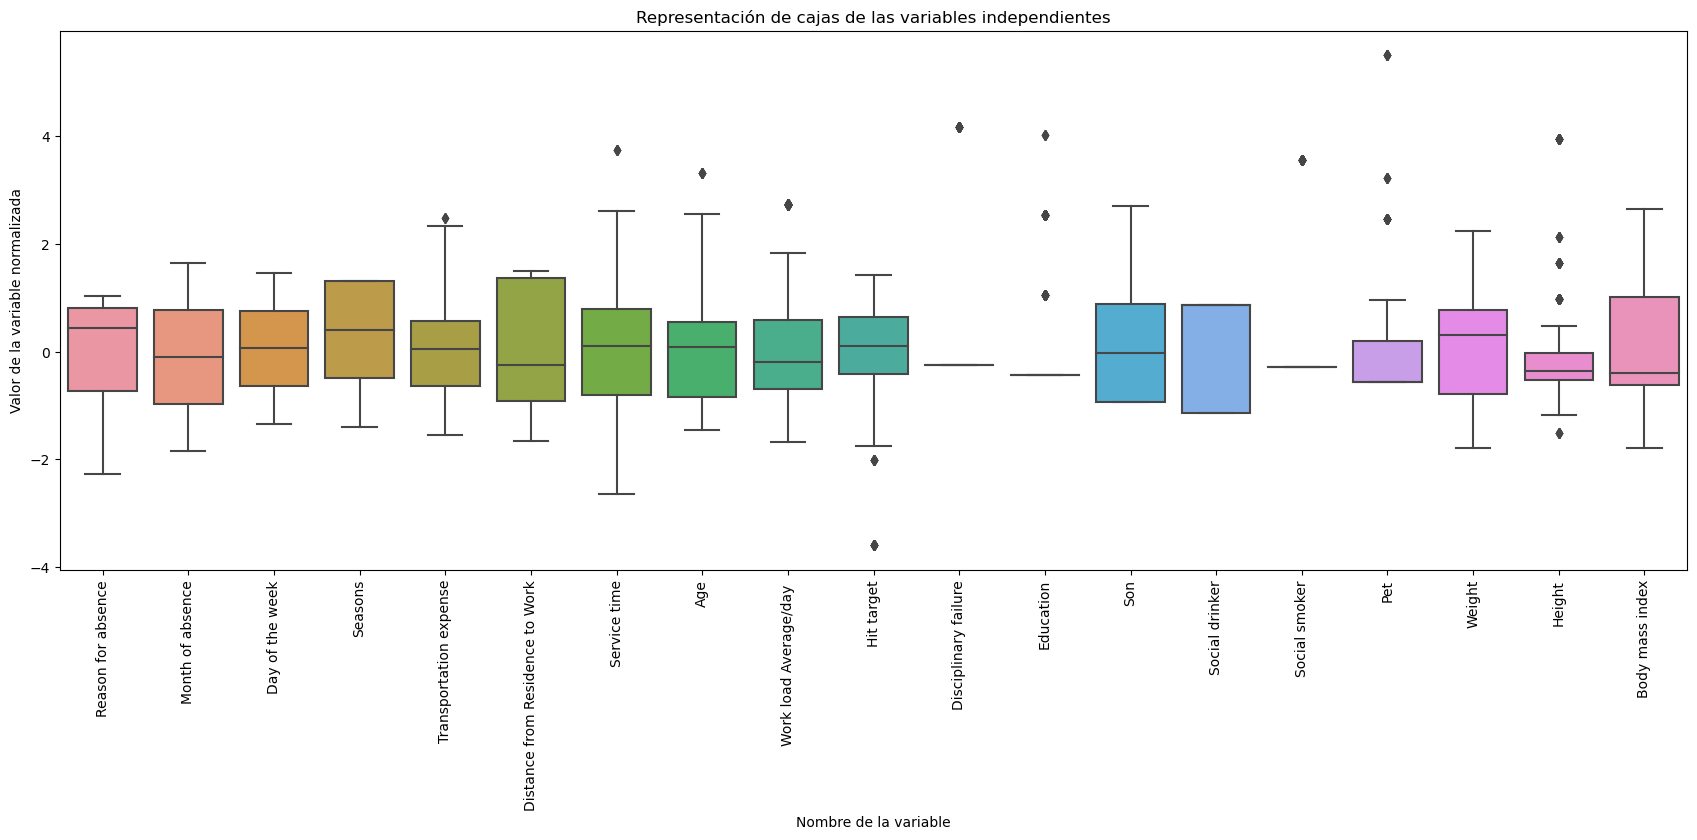

In [11]:
plt.figure(figsize=(21,7))
ax = sns.boxplot(data=X_normalizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)
plt.title(u'Representación de cajas de las variables independientes')
plt.ylabel(u'Valor de la variable normalizada')
_ = plt.xlabel(u'Nombre de la variable')

### Histogramas

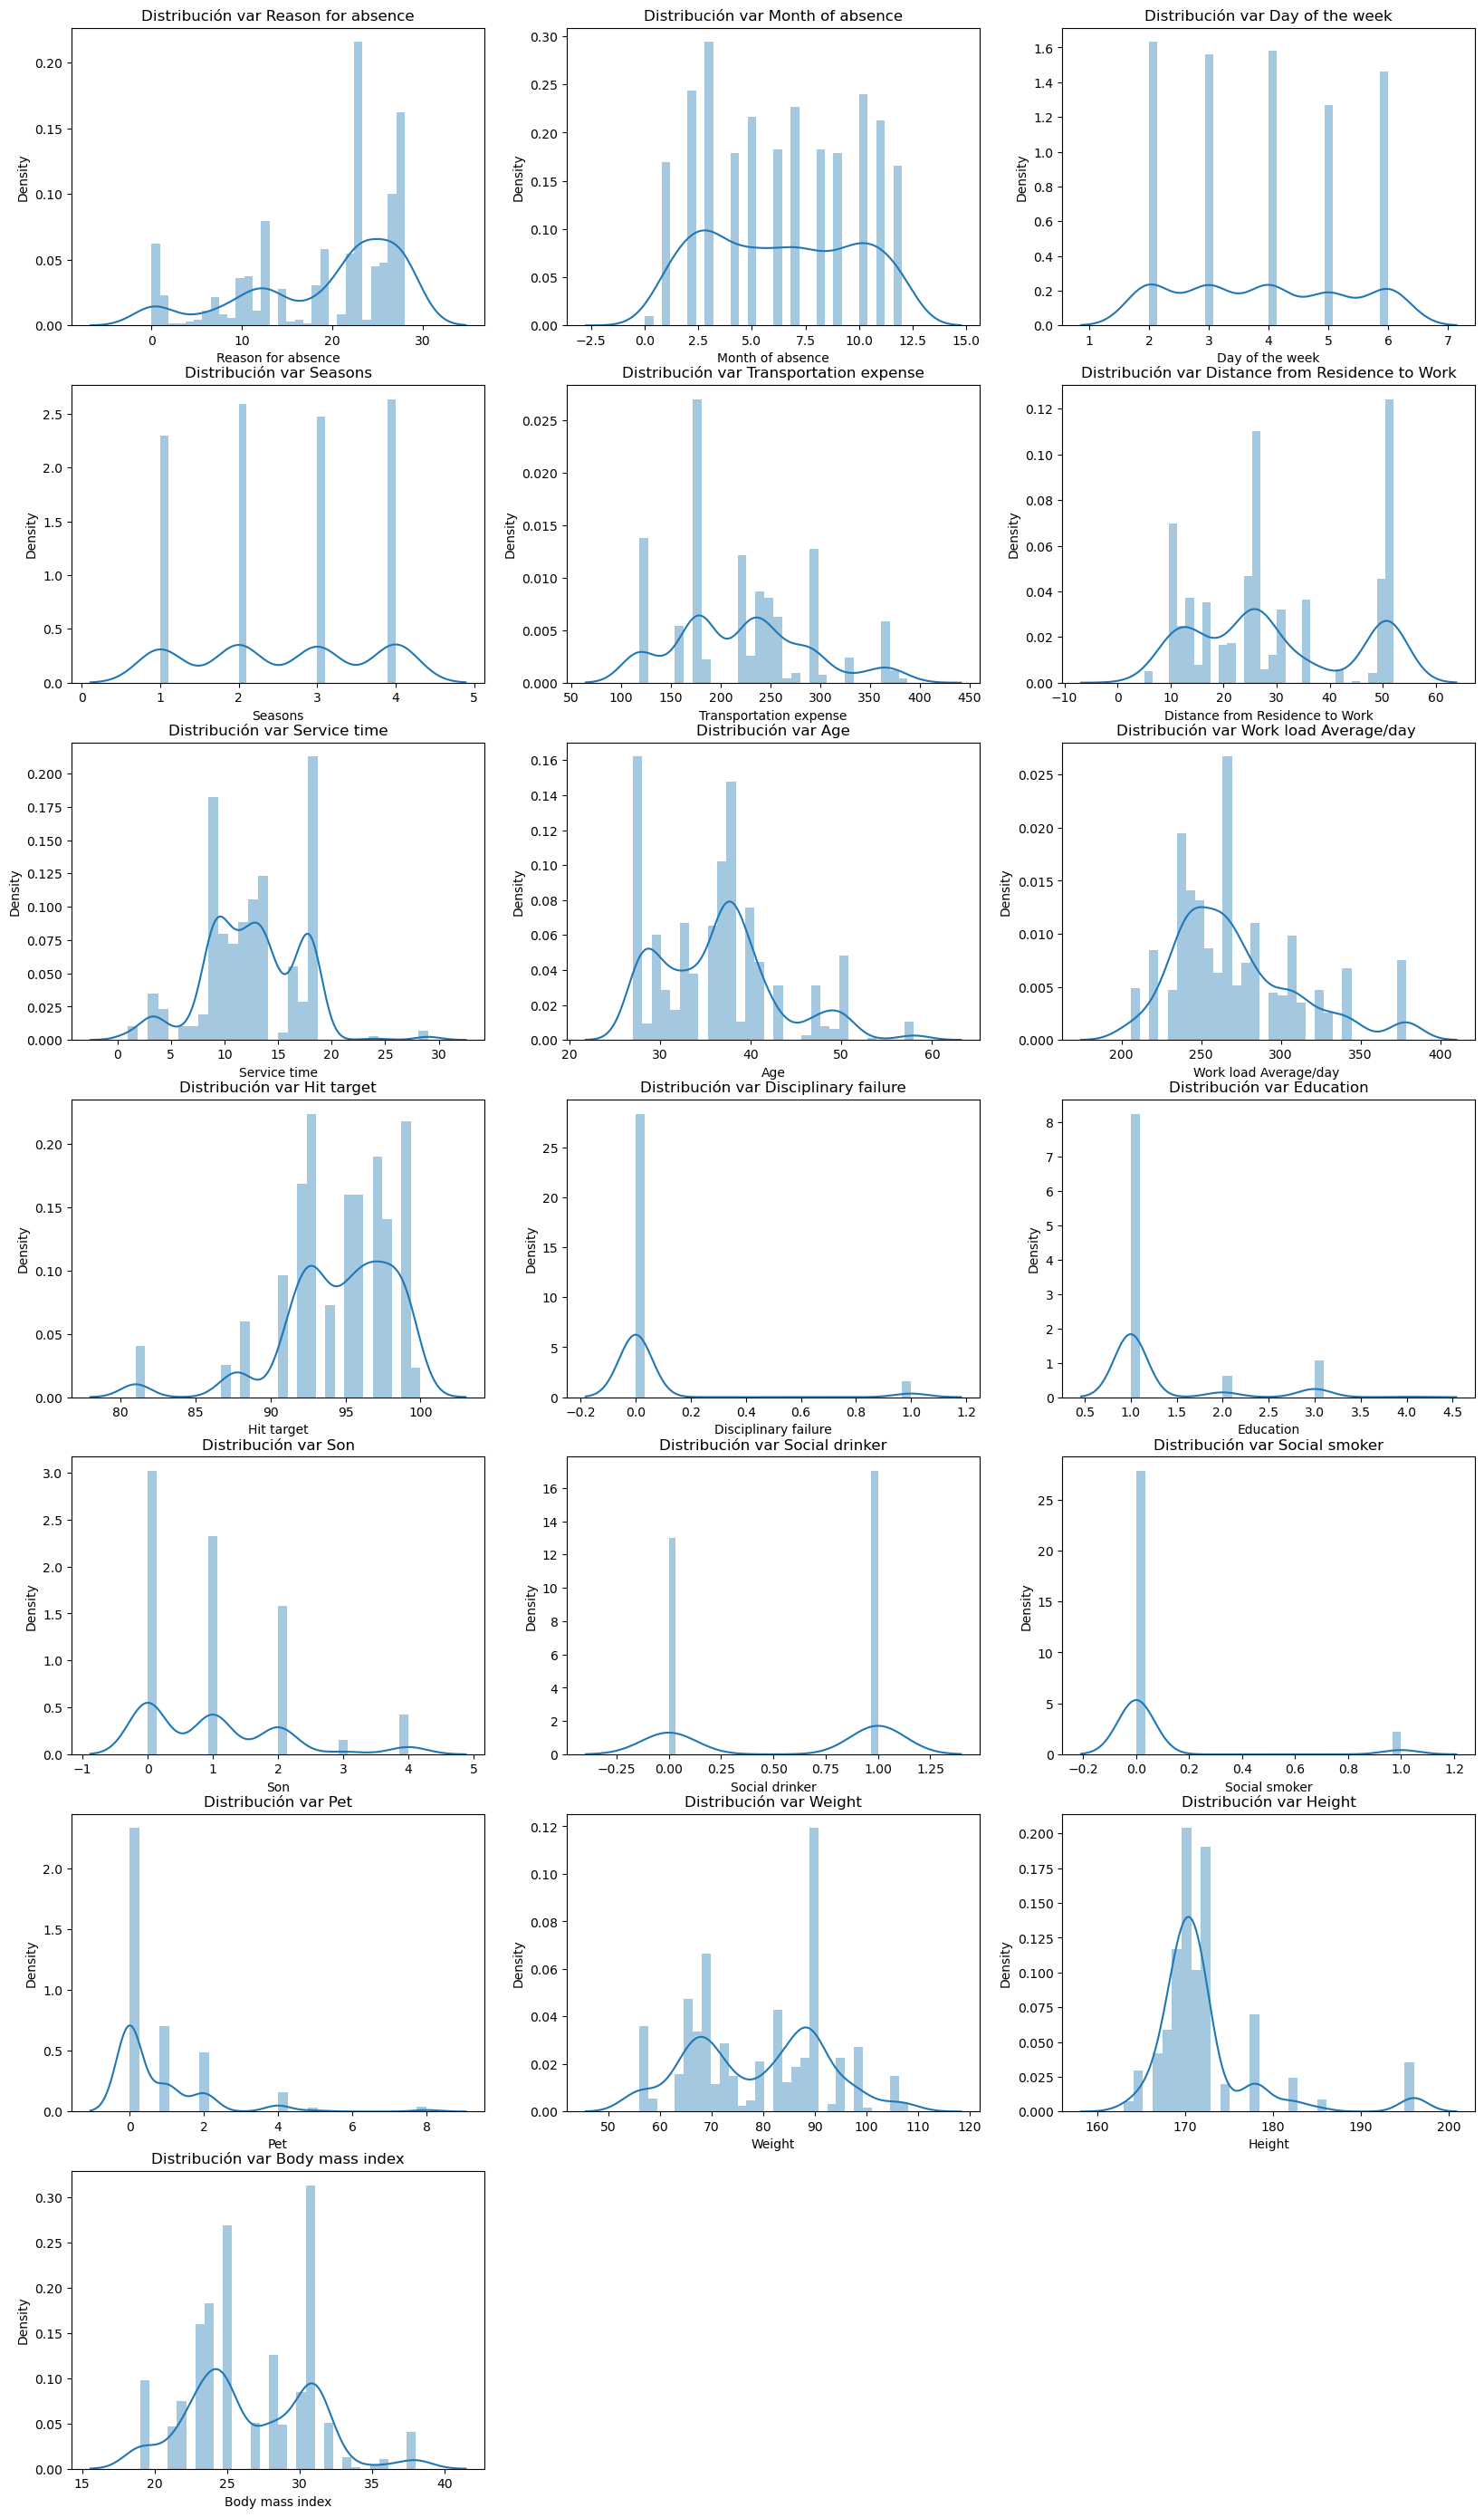

In [12]:
plt.figure(figsize=(20,35))
n = 0
for i, column in enumerate(X.columns):
    n += 1
    plt.subplot(7, 3, n)
    sns.distplot(X[column], bins = 30)
    plt.title('Distribución var {}'.format(column))
plt.show()

### Relación variable vs. target

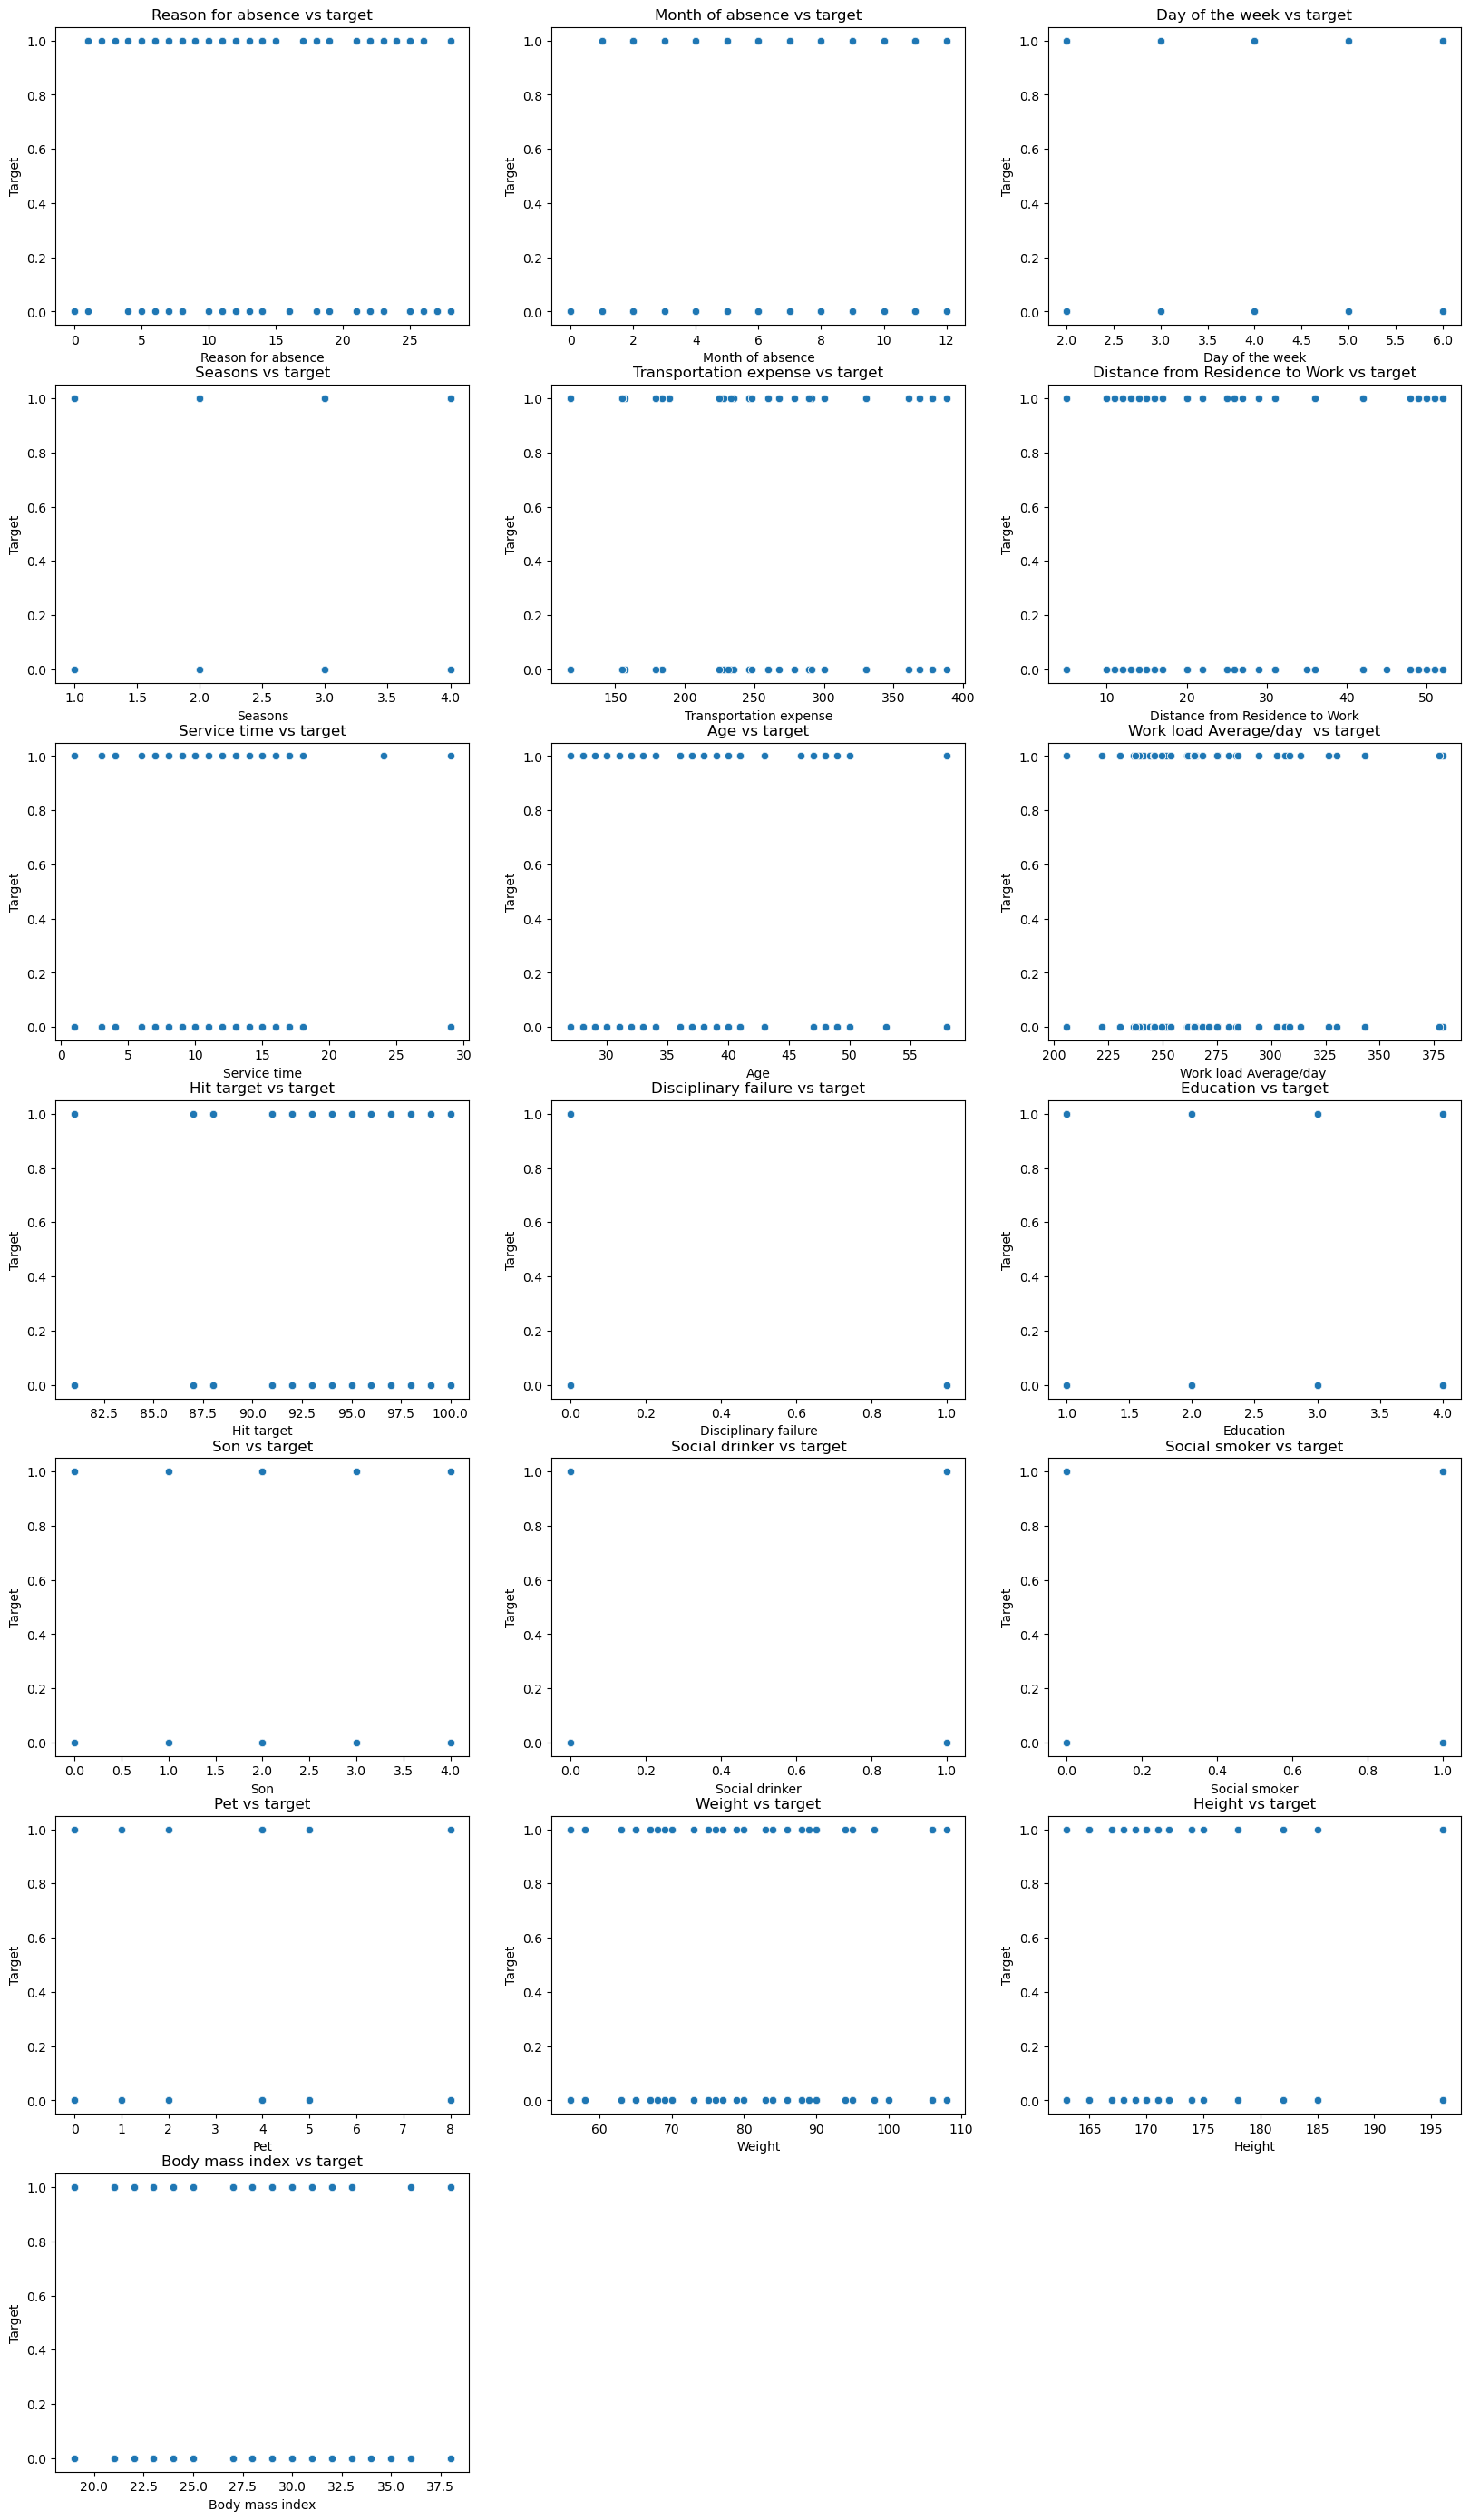

In [28]:
plt.figure(figsize=(20,35))
n = 0
for i, columns in enumerate(X.columns):
    n += 1
    plt.subplot(7, 3, n)
    sns.scatterplot(x = X[columns], y = Y)
    plt.title('%s vs %s' % (columns, 'target'))
    plt.ylabel('Target')
    plt.xlabel(columns)
plt.show()

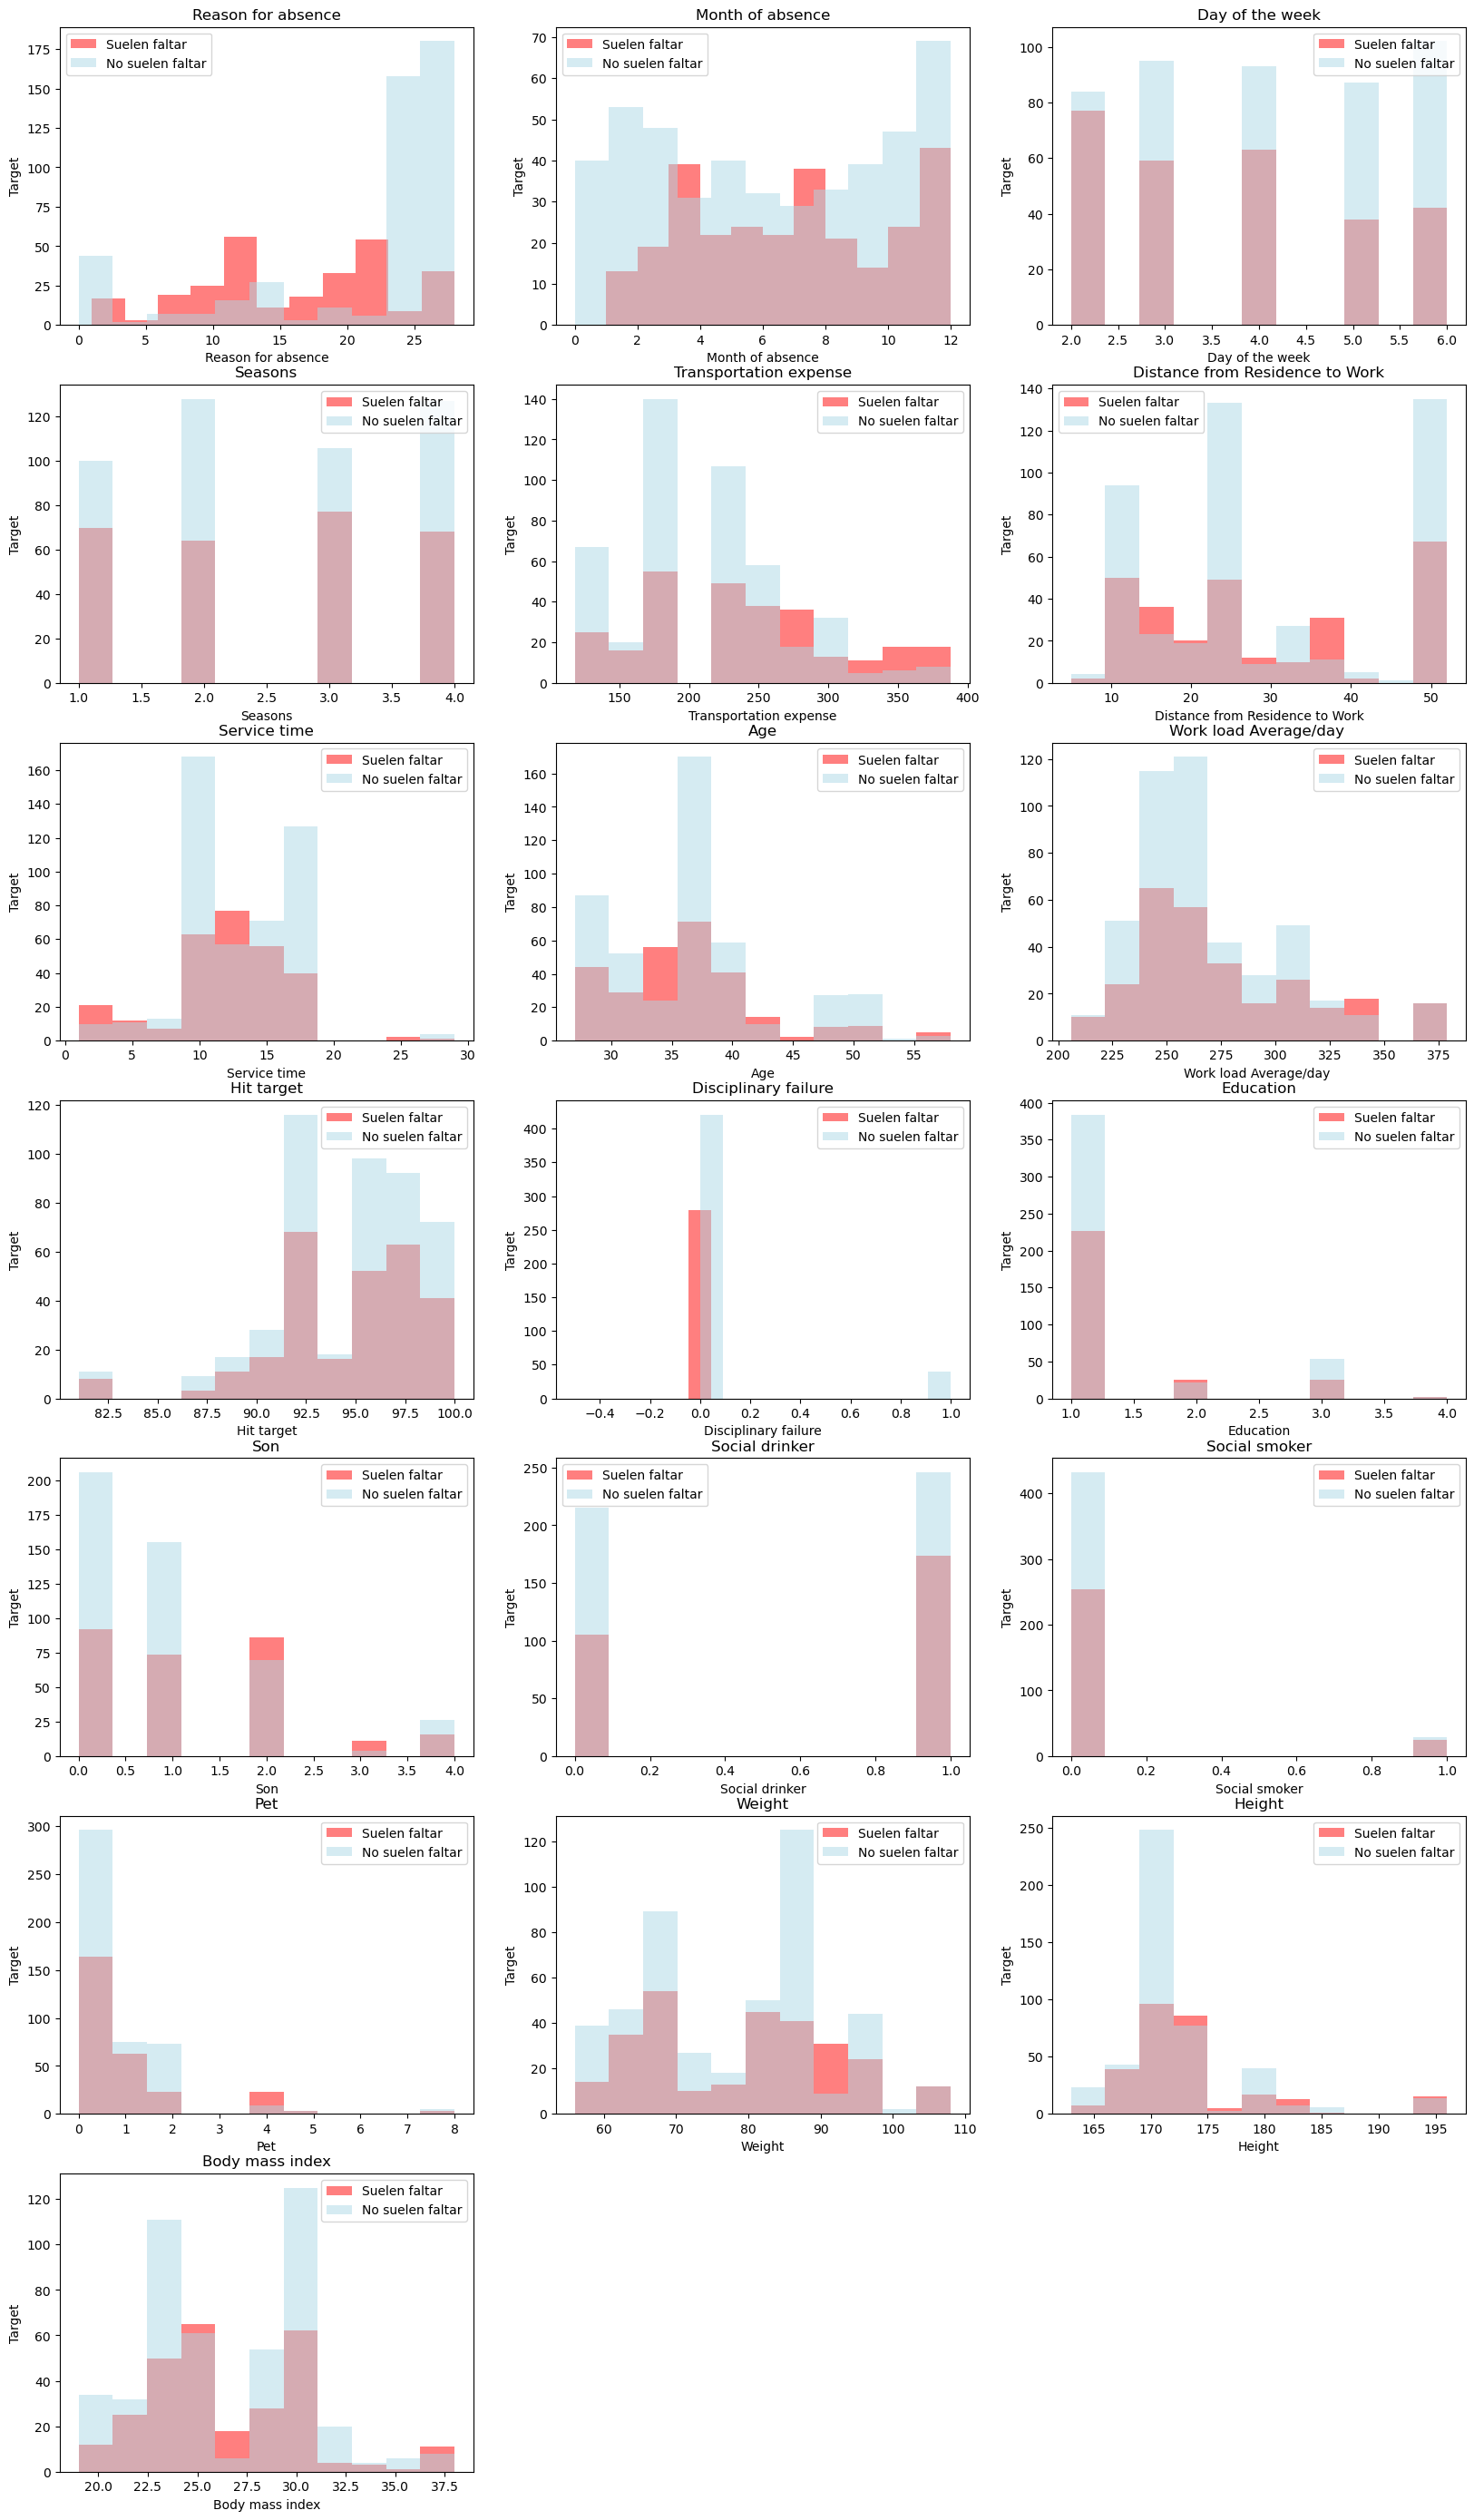

In [43]:
plt.figure(figsize=(20,35))
n = 0
bins = 11
targets=(1, 0)
target_pos, target_neg = targets
for i, columns in enumerate(X.columns):
    n += 1
    plt.subplot(7, 3, n)
    idx_pos = Y == target_pos
    idx_neg = Y == target_neg
    plt.hist(X[columns][idx_pos].values, bins, density = 0, alpha = 0.5, label = 'Suelen faltar', color = 'red')
    plt.hist(X[columns][idx_neg].values, bins, density = 0, alpha = 0.5, label = 'No suelen faltar', color = 'lightblue')
    plt.title('%s' % columns)
    plt.legend(loc = 'best')
    plt.ylabel('Target')
    plt.xlabel(columns)
plt.show()

### Matriz de correlaciones

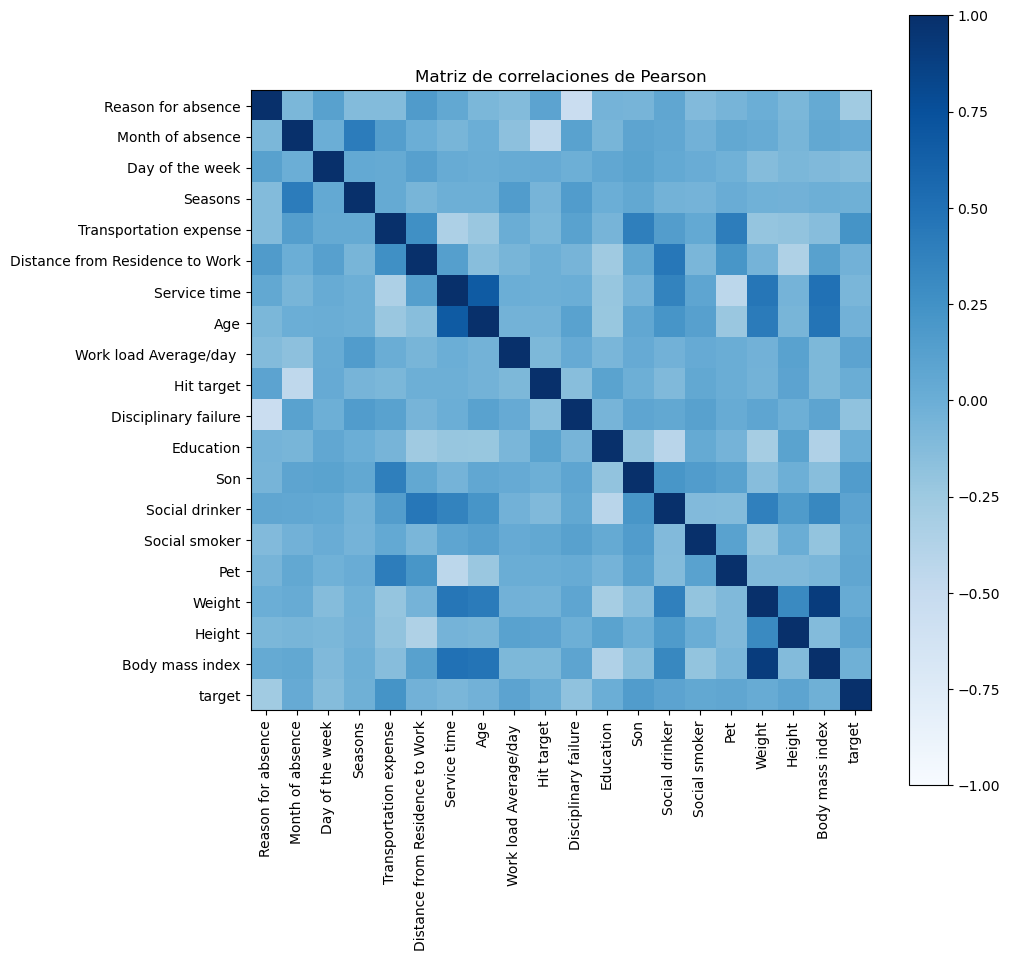

In [44]:
matriz_correlaciones = data.corr(method='pearson')
n_ticks = len(data.columns)
plt.figure(figsize=(10, 10))
plt.xticks(range(n_ticks), data.columns, rotation = 'vertical')
plt.yticks(range(n_ticks), data.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', vmin=-1., vmax=1., cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')
plt.show()

### Variables con mayor correlación con target

In [45]:
correlaciones_target = matriz_correlaciones.values[ -1, : -1]
indices_inversos =  abs(correlaciones_target[ : ]).argsort()[ : : -1]
diccionario = {}
for nombre, correlacion in zip( X.columns[indices_inversos], list(correlaciones_target[indices_inversos] ) ):
    diccionario[nombre] = correlacion
pd.DataFrame.from_dict(diccionario, orient='index', columns=['Correlación con la target'])

,Correlación con la target
Reason for absence,-0.273394
Transportation expense,0.230672
Disciplinary failure,-0.185966
Son,0.149157
Day of the week,-0.131982
Social drinker,0.088076
Work load Average/day,0.086224
Height,0.079963
Service time,-0.076093
Pet,0.067480


### Estandarización de datos

In [46]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

### División de datos en train y test

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

# Modelaje

### Aplicación de un modelo de regresión logística

In [48]:
modelo = LogisticRegression()
parametros = {"C": [0., 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09], "class_weight":['balanced', None]}

Con GridSearchCV se realiza una optimización. Esta función lo que hace es ajustar el modelo que se pasa como argumento con todas las combinaciones posibles de los parámetros. En este caso, todas las combinaciones de C y class_weights.

In [49]:
modelo_GS = GridSearchCV(modelo, param_grid = parametros, cv = 5, scoring = 'roc_auc')
modelo_GS.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                               0.08, 0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [50]:
print(modelo_GS.best_params_, "\nROC AUC: {}".format(round(modelo_GS.best_score_,2)))

{'C': 0.07, 'class_weight': 'balanced'} 
ROC AUC: 0.81


In [51]:
df_search = pd.DataFrame.from_dict(modelo_GS.cv_results_)

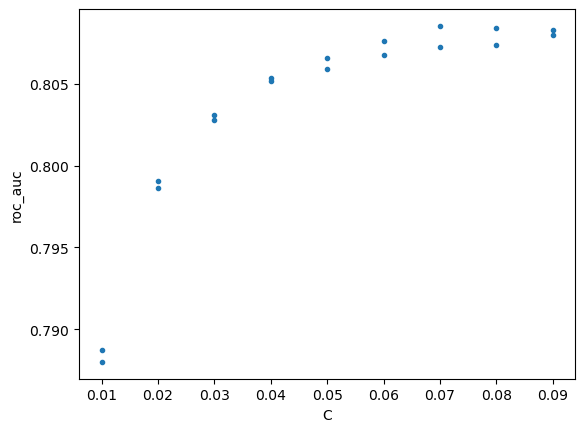

In [52]:
plt.xlabel('C')
plt.ylabel('roc_auc')
_ = plt.plot( df_search['param_C'], df_search['mean_test_score'], '.')

In [53]:
# Nos quedamos con los mejores parámetros obtenidos:
reg_log = LogisticRegression(C = modelo_GS.best_params_['C'], class_weight=modelo_GS.best_params_['class_weight'])
reg_log.fit(X_train, Y_train)

LogisticRegression(C=0.07, class_weight='balanced')

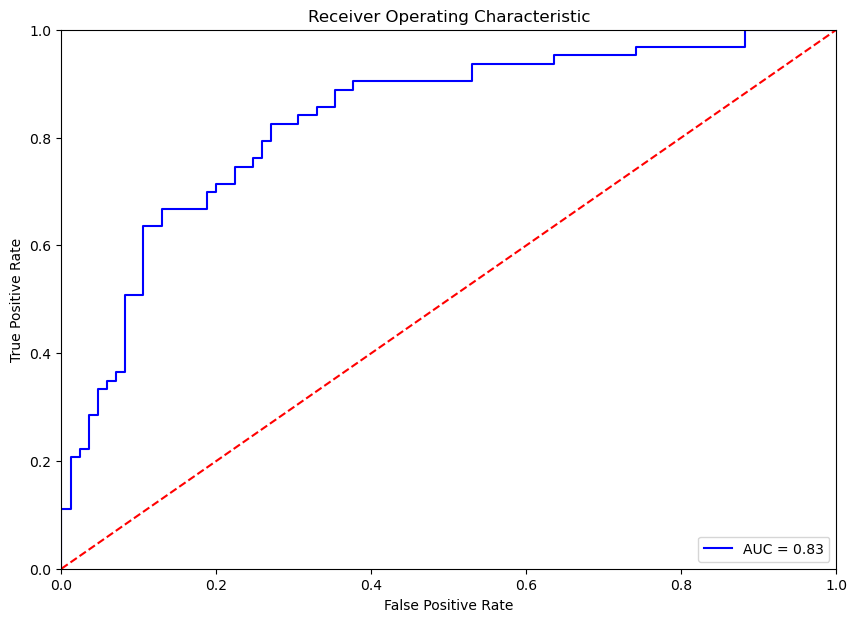

In [54]:
# Validamos el modelo ya elegido y optimizado:
y_test_pred_prob = reg_log.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

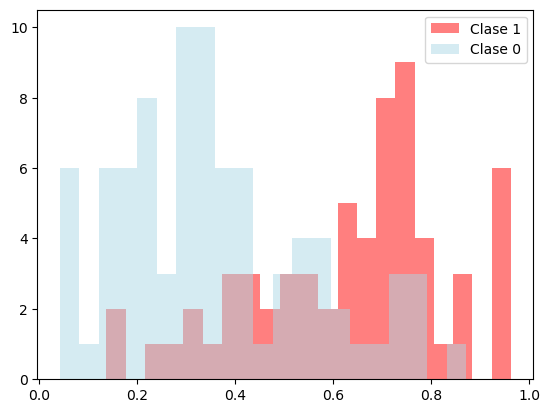

In [55]:
bins = 21
plt.hist(y_test_pred_prob_pos[:, 1], bins, density = 0, alpha=0.5, label='Clase 1', color='red')    
plt.hist(y_test_pred_prob_neg[:, 1], bins, density = 0, alpha=0.5, label='Clase 0', color='lightblue')
plt.legend(loc='best') 

Esta figura representa en celeste las probabilidades que asigna el modelo a los datos que son 0s (cuanto más cerca de 0 la distribución verde mejor) y en rojo las probabilidades asignadas a los datos que son 1s (cuanto más cerca esté de 1 la distribución roja mejor). Las probabilidades que devuelve el modelo son valores continuos entre 0 y 1. Para pasarlo a 0s y a 1s es necesario usar un umbral de corte. Todo lo que sea mayor que el umbral será predicción = 1, y lo que sea menor será predicción = 0.

In [56]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2))) 

Matriz de confusión
 [[74 11]
 [22 41]]

Accuracy	0.78
Sensitividad	0.65
Precisión	0.79


##### Matriz de Confusión:
* Verdaderos Positivos (VP): 74 personas que realmente estarían ausentes en el trabajo.
* Falsos Positivos (FP): 11 personas que el modelo predijo que estarían ausentes en el trabajo, pero en realidad no lo estarían.
* Verdaderos Negativos (VN): 22 personas que realmente no estarían ausentes en el trabajo.
* Falsos Negativos (FN): 41 personas que el modelo predijo que no estarían ausentes en el trabajo, pero en realidad lo estarían.

Accuracy (Exactitud):
Este es el porcentaje de predicciones correctas en general. En este caso, el modelo tiene una exactitud del 78%, lo que significa que el 80% de las veces, predice correctamente si una persona estaría ausente en el trabajo o no.

Sensitividad (Recall):
También conocido como tasa de verdaderos positivos o cobertura. Es la proporción de casos positivos que fueron correctamente identificados por el modelo. Aquí, la sensibilidad es del 65%, lo que indica que el modelo identifica correctamente al 65% de las personas que realmente estarían ausentes en el trabajo.

Precisión:
Es la proporción de verdaderos positivos sobre el total de predicciones positivas hechas por el modelo. En este caso, la precisión es del 79%, lo que significa que el 79% de las veces que el modelo predice que alguien estaría ausente en el trabajo, es correcto.

En resumen, aunque el modelo tiene una buena exactitud general del 78% y una buena precisión, su sensibilidad podría mejorarse.